<a href="https://colab.research.google.com/github/armangupta910/Movie-Recommendor-System/blob/main/Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# DATA PRE-PROCESSING

1. Getting Data set
2. Doing No Tag Imputation
3. Dropping timestamp_y column
4. Renaming timestamp_x column to timestamp colum
5. Checking number of mising values

In [ ]:

# Replace 'url_to_csv' with the actual URL of your dataset
url_to_csv = 'https://raw.githubusercontent.com/armangupta910/Movie-Recommendor-System/main/dataSet/complete_data%20-%20complete_data%20(1).csv.csv'
data = pd.read_csv(url_to_csv)

# Imputation: Replace NaN in 'tag' column with 'No Tag'
data['tag'].fillna('No Tag', inplace=True)

# Drop 'timestamp_y' column
data.drop('timestamp_y', axis=1, inplace=True)

#Rename 'timestamp_x' column to timestamp
data.rename(columns={'timestamp_x': 'timestamp'}, inplace=True)

# Display the number of missing values for each column
missing_values = data.isnull().sum()
print(missing_values)


print(data.head())


userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
tag          0
dtype: int64
   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres     tag  
0  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
1  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
2  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
3  Adventure|Animation|Children|Comedy|Fantasy  No Tag  
4  Adventure|Animation|Children|Comedy|Fantasy  No Tag  


1. Changing timestamp colum to contain the actual Date and Time

2. Generating

*   Date of Month
*   Day of Week
*   Month
*   Year
*   Season

using the Timestamp Column
3. Encdoing the Seasons as


*   Winter -> 1

*   Spring -> 2
*   Summer -> 3


*   Fall -> 4



In [ ]:

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

# Extract date of month, day of month, month, and year
data['date_of_month'] = data['timestamp'].dt.day
data['day_of_week'] = data['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year

# Define a function to determine the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to the 'month' column to create a new 'season' column
data['season'] = data['month'].apply(get_season)



# Season to number mapping
season_to_number = {
    'Winter': 1,
    'Spring': 2,
    'Summer': 3,
    'Fall': 4
}

# Replace the season strings with their corresponding numbers
data['season'] = data['season'].map(season_to_number)

# Display the modified DataFrame to verify the changes
print(data.head())



   userId  movieId  rating           timestamp             title  \
0       1        1     4.0 2000-07-30 18:45:03  Toy Story (1995)   
1       5        1     4.0 1996-11-08 06:36:02  Toy Story (1995)   
2       7        1     4.5 2005-01-25 06:52:26  Toy Story (1995)   
3      15        1     2.5 2017-11-13 12:59:30  Toy Story (1995)   
4      17        1     4.5 2011-05-18 05:28:03  Toy Story (1995)   

                                        genres     tag  date_of_month  \
0  Adventure|Animation|Children|Comedy|Fantasy  No Tag             30   
1  Adventure|Animation|Children|Comedy|Fantasy  No Tag              8   
2  Adventure|Animation|Children|Comedy|Fantasy  No Tag             25   
3  Adventure|Animation|Children|Comedy|Fantasy  No Tag             13   
4  Adventure|Animation|Children|Comedy|Fantasy  No Tag             18   

   day_of_week  month  year  season  
0            6      7  2000       3  
1            4     11  1996       4  
2            1      1  2005       1  


1. Cheking number of unique genres
2. Encoding them as follows :-


Action 1

Adventure 2

Animation 3

Children 4

Comedy 5

Crime 6

Documentary 7

Drama 8

Fantasy 9

Film-Noir 10

Horror 11

IMAX 12

Musical 13

Mystery 14

Romance 15

Sci-Fi 16

Thriller 17

War 18

Western 19




In [ ]:
genres_split = data['genres'].str.split('|')

# Flatten the list of lists to get a single list of genres
all_genres = [genre for sublist in genres_split for genre in sublist]

# Convert to a set to keep only unique genres, then back to a list if desired
unique_genres = list(set(all_genres))

# Sort the genres alphabetically, if needed
unique_genres.sort()

# Print the list of unique genres
print("Number of unique Genres :- ",len(unique_genres))
# for i in unique_genres:
#   print(i)


# Genre to number mapping as per your encoding
genre_to_number = {
    'Action': 1,
    'Adventure': 2,
    'Animation': 3,
    'Children': 4,
    'Comedy': 5,
    'Crime': 6,
    'Documentary': 7,
    'Drama': 8,
    'Fantasy': 9,
    'Film-Noir': 10,
    'Horror': 11,
    'IMAX': 12,
    'Musical': 13,
    'Mystery': 14,
    'Romance': 15,
    'Sci-Fi': 16,
    'Thriller': 17,
    'War': 18,
    'Western': 19,
    'No Genres': 0  # Assuming 'No Genres' as 0
}

# Function to encode a genre string into its corresponding numbers separated by dashes
def encode_genres(genre_string):
    # Split the genre string by '|' and encode each genre using the genre_to_number mapping
    encoded_genres = [str(genre_to_number.get(genre, 0)) for genre in genre_string.split('|')]
    # Join the encoded genres with dashes
    return '-'.join(encoded_genres)

# Replace empty genre fields with 'No Genres'
data['genres'] = data['genres'].replace('', 'No Genres')

# Apply the encoding function to each genre string in the DataFrame
data['genres'] = data['genres'].apply(encode_genres)

# Display the modified DataFrame
print(data.head())



Number of unique Genres :-  20
   userId  movieId  rating           timestamp             title     genres  \
0       1        1     4.0 2000-07-30 18:45:03  Toy Story (1995)  2-3-4-5-9   
1       5        1     4.0 1996-11-08 06:36:02  Toy Story (1995)  2-3-4-5-9   
2       7        1     4.5 2005-01-25 06:52:26  Toy Story (1995)  2-3-4-5-9   
3      15        1     2.5 2017-11-13 12:59:30  Toy Story (1995)  2-3-4-5-9   
4      17        1     4.5 2011-05-18 05:28:03  Toy Story (1995)  2-3-4-5-9   

      tag  date_of_month  day_of_week  month  year  season  
0  No Tag             30            6      7  2000       3  
1  No Tag              8            4     11  1996       4  
2  No Tag             25            1      1  2005       1  
3  No Tag             13            0     11  2017       4  
4  No Tag             18            2      5  2011       2  


1. Checking unique number of Tags
2. Encoding them

In [ ]:
# Assuming the delimiter for tags is a comma ','; adjust as necessary
# Split the 'tag' column into lists of tags
tag_lists = data['tag'].dropna().str.split(',')

# Flatten the list of lists to a single list containing all tags
all_tags = [tag.strip() for sublist in tag_lists for tag in sublist]

# Convert to a set to remove duplicates and count unique tags
unique_tags = set(all_tags)

# Number of unique tags
num_unique_tags = len(unique_tags)

print(f'Number of unique tags: {num_unique_tags}')

# Assuming the 'tag' preprocessing has been done
# And assuming tags are separated by a comma ',' in the 'tag' column

# Generate a list of unique tags from the 'tag' column
tag_lists = data['tag'].dropna().str.split(',')
all_tags = [tag.strip() for sublist in tag_lists for tag in sublist]
unique_tags = set(all_tags)

# Create a mapping from tag to a unique number (starting from 1 for example)
tag_to_number = {tag: i+1 for i, tag in enumerate(unique_tags)}

# Function to encode tags in a row with their corresponding numbers
def encode_tags(tag_string):
    if pd.isnull(tag_string):
        return None  # Return None or an appropriate value for missing tags
    # Split the tag string by ',', map each tag to its number, join back with commas
    return ','.join(str(tag_to_number[tag.strip()]) for tag in tag_string.split(','))

# Apply the encoding function to the 'tag' column in place
data['tag'] = data['tag'].apply(encode_tags)

# Print the encoding scheme
print("Tag to number encoding scheme:")
# for tag, number in tag_to_number.items():
#     print(f"{tag}: {number}")


# Optionally, show the head of the DataFrame to verify the changes
print(data.head())




Number of unique tags: 1544
Tag to number encoding scheme:
   userId  movieId  rating           timestamp             title     genres  \
0       1        1     4.0 2000-07-30 18:45:03  Toy Story (1995)  2-3-4-5-9   
1       5        1     4.0 1996-11-08 06:36:02  Toy Story (1995)  2-3-4-5-9   
2       7        1     4.5 2005-01-25 06:52:26  Toy Story (1995)  2-3-4-5-9   
3      15        1     2.5 2017-11-13 12:59:30  Toy Story (1995)  2-3-4-5-9   
4      17        1     4.5 2011-05-18 05:28:03  Toy Story (1995)  2-3-4-5-9   

   tag  date_of_month  day_of_week  month  year  season  
0  842             30            6      7  2000       3  
1  842              8            4     11  1996       4  
2  842             25            1      1  2005       1  
3  842             13            0     11  2017       4  
4  842             18            2      5  2011       2  


# EDA

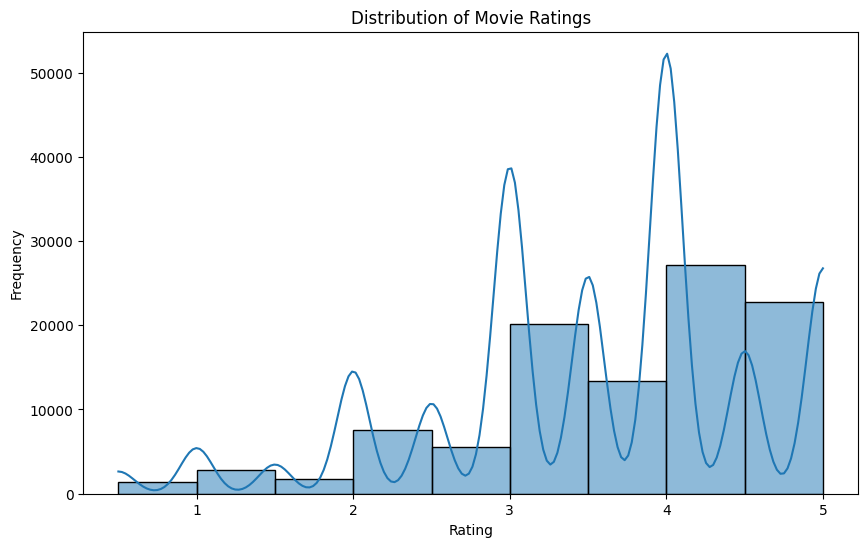

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], kde=True, binwidth=0.5)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


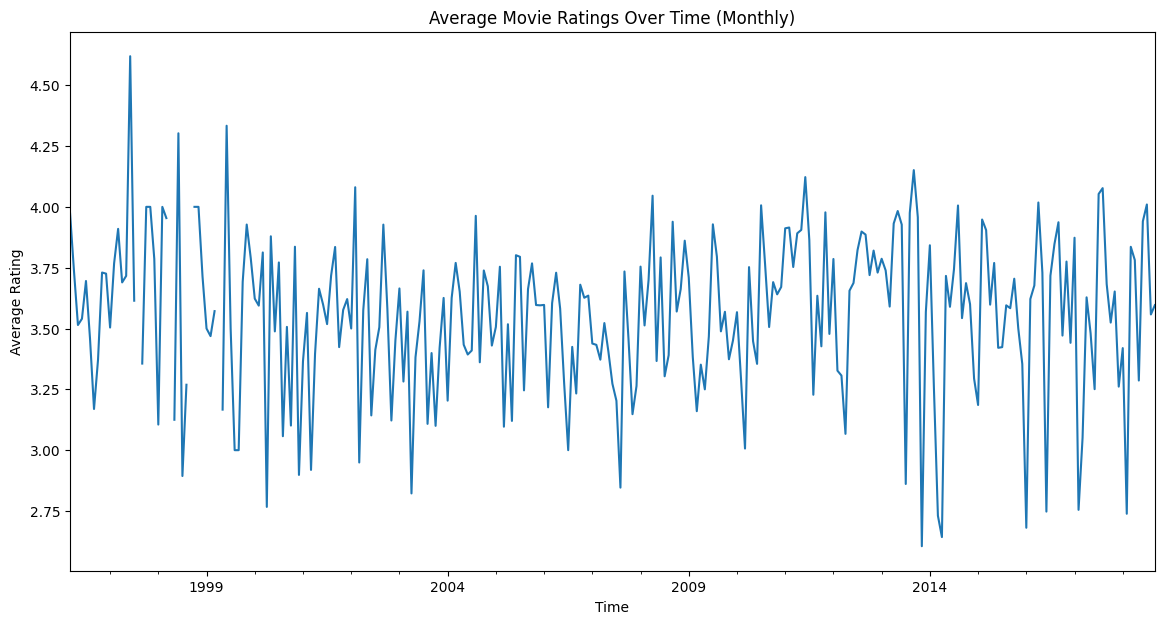

In [ ]:
# Plot average ratings over time (monthly)
plt.figure(figsize=(14, 7))
data.set_index('timestamp').resample('M')['rating'].mean().plot()
plt.title('Average Movie Ratings Over Time (Monthly)')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.show()


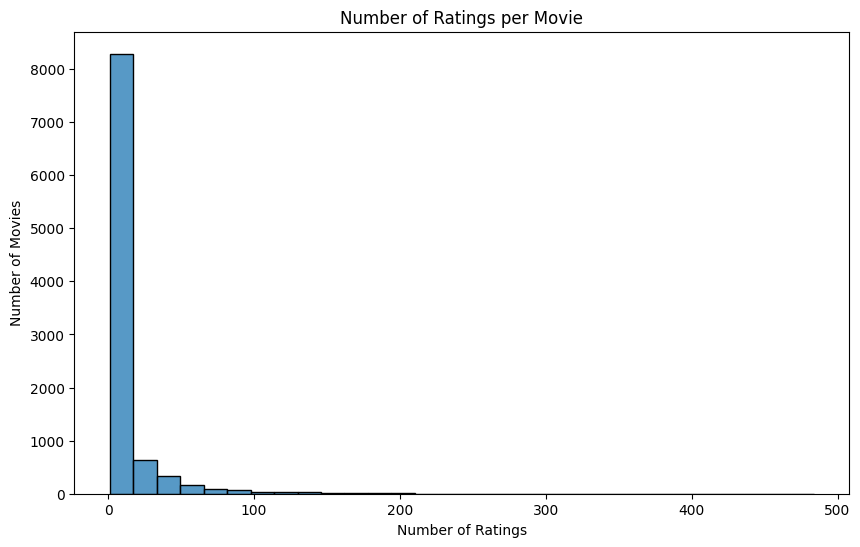

In [ ]:
# Plotting the number of ratings per movie
plt.figure(figsize=(10, 6))
sns.histplot(data['movieId'].value_counts(), bins=30)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()


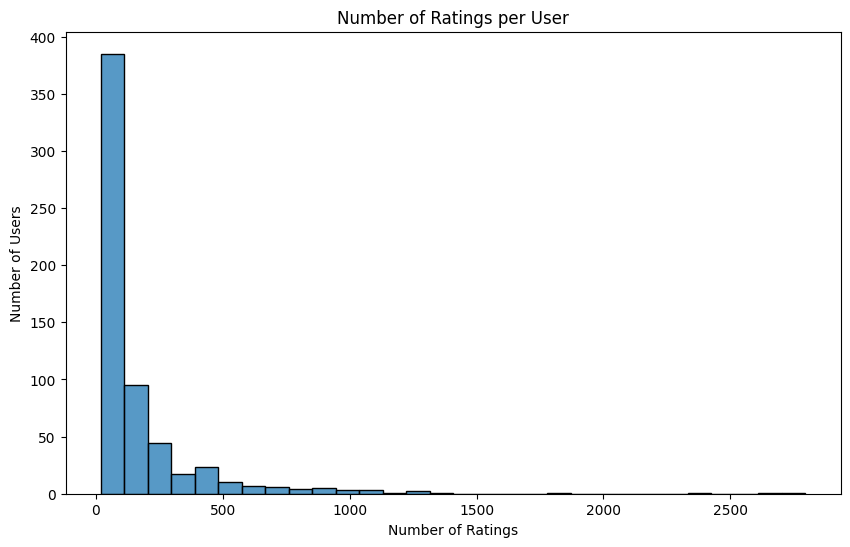

In [ ]:
# Plotting the number of ratings per user
plt.figure(figsize=(10, 6))
sns.histplot(data['userId'].value_counts(), bins=30)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


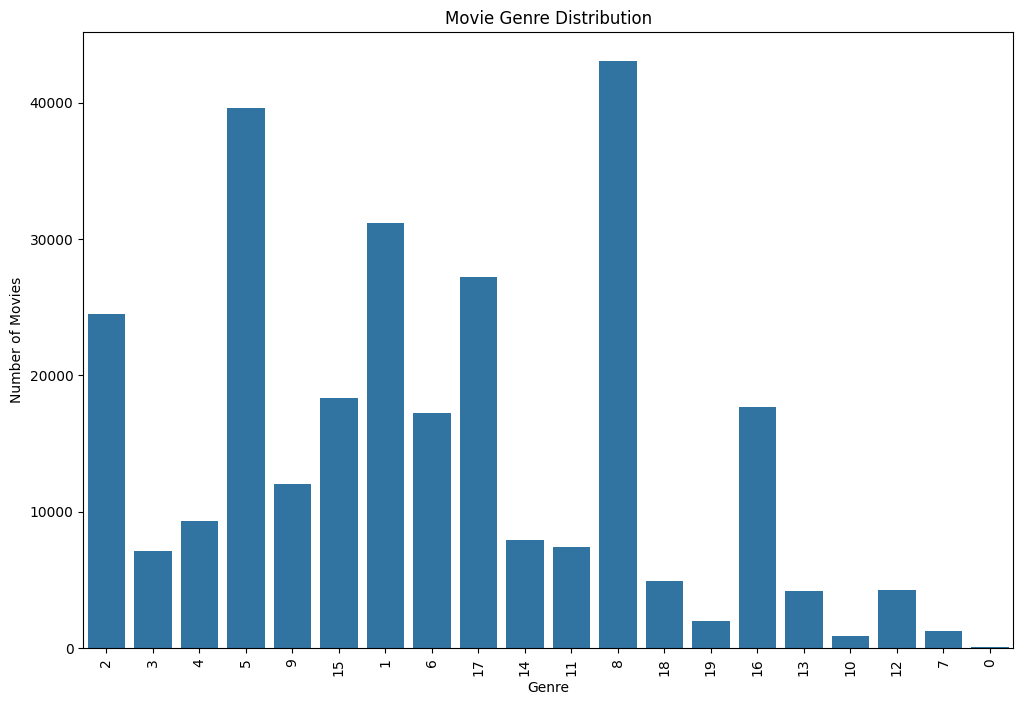

In [ ]:
from collections import Counter

# Count the occurrence of each genre
genre_counts = Counter([genre for sublist in data['genres'].str.split('-') for genre in sublist])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=90)
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()


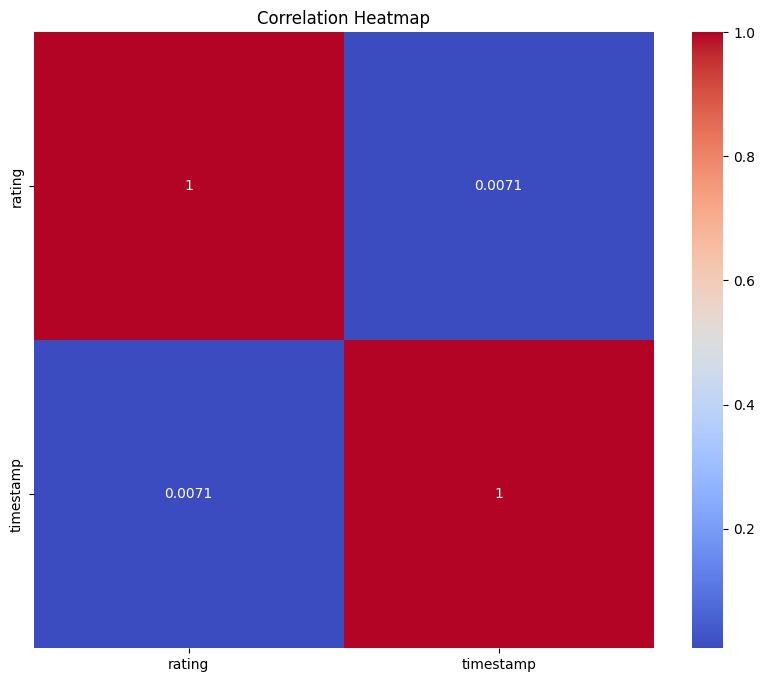

In [ ]:
# Calculate correlations
corr = data[['rating', 'timestamp']].corr()  # include other numeric columns as needed

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
